#### 그림, 실습코드 등 학습자료 출처 : https://datascienceschool.net

#### 1. 공분산과 상관계수

<img src="1.jpg" width="1000" />

#### 2. 확률변수의 공분산과 상관계수

<img src="2.jpg" width="1000" />

상관계수로 분포의 형상을 추측할 때 주의할 점은 개별 자료가 상관계수에 미치는 영향력이 각각 다르다는 점이다. 다음은 Frank Anscombe의 논문에 예시된 자료로 서로 다른 4종류의 2차원 데이터셋을 포함하는데 4종류 데이터셋 모두 상관계수가 약 0.816로 동일하다.

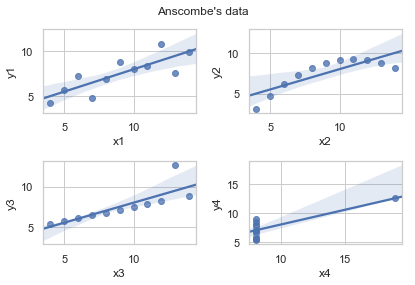

In [1]:
%matplotlib inline

data = sm.datasets.get_rdataset("anscombe")
df = data.data
df[["x1", "y1", "x2", "y2", "x3", "y1", "x4", "y4"]]

plt.subplot(221)
sns.regplot(x="x1", y="y1", data=df)
plt.subplot(222)
sns.regplot(x="x2", y="y2", data=df)
plt.subplot(223)
sns.regplot(x="x3", y="y3", data=df)
plt.subplot(224)
sns.regplot(x="x4", y="y4", data=df)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle("Anscombe's data")
plt.show()

첫번째 데이터셋은 우리가 통상적으로 많이 볼 수 있는 데이터 세트라고 할 수 있다. 그러나 두번째 데이터셋은 비선형으로 완벽한 상관관계를 가진다. 즉 x값을 알면 y값을 완벽하게 알 수 있다. 하지만 상관계수는 약 0.816으로 1인 아닌 값을 가진다. 즉, 상관계수는 비선형 상관관계를 표현하지 못한다.

세번째 데이터셋과 네번째 데이터 세트에서 볼 수 있듯이 나머지 데이터의 상관계수가 1 또는 0인 경우에도 단 하나의 outlier 데이터에 의해 상관계수가 크게 달라질 수 있다.

#### 3. 다변수 확률변수의 표본공분산

<img src="3.jpg" width="1000" />

<img src="4.jpg" width="1000" />

<img src="5.jpg" width="1000" />

#### 4. 다변수 확률변수의 공분산

다변수 확률변수의 이론적 공분산 행렬은 시그마로 표기하며 아래와 같이 정의할 수 있다.

$$\ \begin{eqnarray}
\Sigma 
&=& \text{Cov}[X] \\
&=& \text{E} \left[ (X - \text{E}[X])(X - \text{E}[X])^T \right] \\
&=& \text{E} 
\left[ 
\begin{bmatrix}
X_1 - \text{E}[X_1] \\
X_2 - \text{E}[X_2] \\
\vdots \\
X_M - \text{E}[X_M] \\
\end{bmatrix}
\begin{bmatrix}
X_1 - \text{E}[X_1] &
X_2 - \text{E}[X_2] &
\cdots &
X_M - \text{E}[X_M]
\end{bmatrix}
\right] \\
&=&
\text{E} 
\begin{bmatrix}
(X_1 - \text{E}[X_1])^2 & (X_1 - \text{E}[X_1])(X_2 - \text{E}[X_2]) & \cdots & (X_1 - \text{E}[X_1])(X_M - \text{E}[X_M]) \\
(X_1 - \text{E}[X_1])(X_2 - \text{E}[X_2]) & (X_2 - \text{E}[X_2])^2 & \cdots & (X_2 - \text{E}[X_2])(X_M - \text{E}[X_M]) \\
\vdots &  \vdots  & \ddots &  \vdots  \\
(X_1 - \text{E}[X_1])(X_M - \text{E}[X_M]) & (X_2 - \text{E}[X_2])(X_M - \text{E}[X_M]) & \cdots & (X_M - \text{E}[X_M])^2 \end{bmatrix}
\\
&=&
\begin{bmatrix}
\sigma_{x_1}^2  &  \sigma_{x_1x_2} &  \sigma_{x_1x_3} &  \cdots &  \sigma_{x_1x_M} \\
\sigma_{x_1x_2} &  \sigma_{x_2}^2  &  \sigma_{x_2x_3} &  \cdots &  \sigma_{x_2x_M} \\
\vdots          &  \vdots          &  \vdots          &  \ddots &  \vdots          \\
\sigma_{x_1x_M} &  \sigma_{x_2x_M} &  \sigma_{x_3x_M} &  \cdots &  \sigma_{x_M}^2 \\
\end{bmatrix}
\end{eqnarray} $$